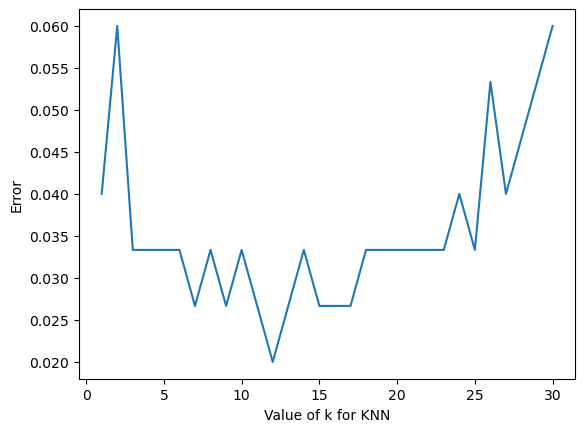

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection  import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 读取鸢尾花数据集

iris=load_iris()
x=iris.data
y=iris.target
k_range=range(1,31)
k_error=[]

# 循环找到最合适的k值
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    ##cv参数决定数据集划分比例，这里是按照5:1划分训练集和测试集
    scores=cross_val_score(knn,x,y,cv=6,scoring='accuracy')
    k_error.append(1-scores.mean())

#画图，x轴为k值，y值为误差值
plt.plot(k_range,k_error)
plt.xlabel("Value of k for KNN")
plt.ylabel("Error")
plt.show()


有了这张图，我们就能明显看出 K 值取多少的时候误差最小，这里明显是 K=11 最好。当然在实际问题中，如果数据集比较大，那为减少训练时间，K 的取值范围可以缩小。

有了 K 值我们就能运行 KNN 算法了，具体代码如下：

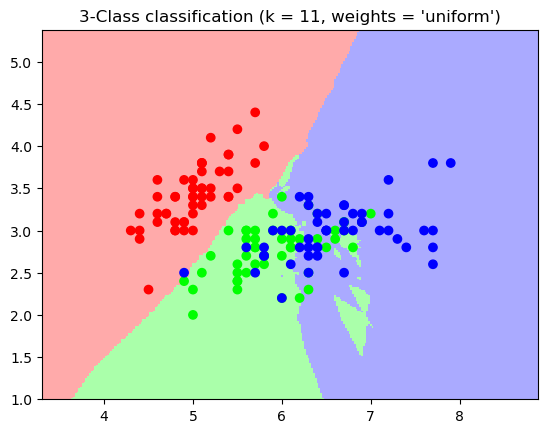

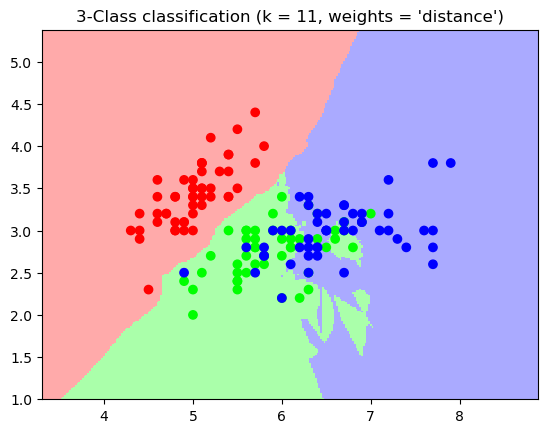

In [3]:
import matplotlib.pyplot as plt
from numpy import *
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import numpy as np
n_neighbors = 11

 # 导入一些要玩的数据
iris = datasets.load_iris()
x = iris.data[:, :2]  # 我们只采用前两个feature,方便画图在二维平面显示
y = iris.target

h = .02  # 网格中的步长

 # 创建彩色的图
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#weights是KNN模型中的一个参数，上述参数介绍中有介绍，这里绘制两种权重参数下KNN的效果图
for weights in ['uniform', 'distance']:
    # 创建了一个knn分类器的实例，并拟合数据
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(x, y)

    # 绘制决策边界，为此，我们将为每个分配一个颜色
    # 来绘制网格中的点 [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 将结果放入一个彩色图中
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # 绘制训练点
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.show()